#### Even after implementing PCA we don't observe any improvement in the model prediction, it was same as before. However, we can observe the change in the confusion matrix. There are changes in tp, fp, etc but there are no changes in the overall prediction accuracy. 

In [72]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [73]:
# to adjust the graph sizes
from matplotlib.pyplot import figure

In [74]:
#importing dataset

df = pd.read_csv('C:\\Users\\Admin\\Desktop\\datasets\\heart_disease.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [75]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)

## Data exploration and visualization

In [76]:
# to count the total no. of people with and without heart disease
# 0 => Don't have heart disease
# 1 => have heart disease
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

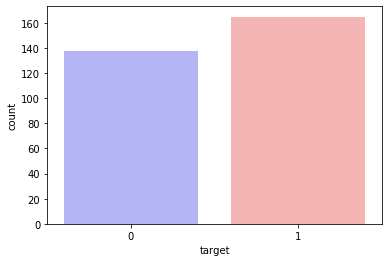

In [77]:
sns.countplot(x= 'target', data=df , palette= 'bwr')
plt.show()

In [78]:
countNoDisease = len (df[df.target == 0])
countHaveDisease = len( df[df.target == 1])
print('Percentage of Patients havent Heart Disease: {:.2f}%'.format((countNoDisease / len(df.target))*100))
print('Percentage of Patients havent Heart Disease: {:.2f}%'.format((countHaveDisease / len(df.target))*100))


Percentage of Patients havent Heart Disease: 45.54%
Percentage of Patients havent Heart Disease: 54.46%


Text(0.5, 0, 'Sex (0 = Female, 1= Male)')

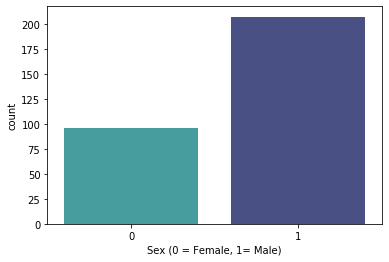

In [79]:
sns.countplot(x='sex', data= df, palette='mako_r')
plt.xlabel('Sex (0 = Female, 1= Male)')

In [80]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale/len(df.sex)*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale/len(df.sex)*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [81]:
# visualizing each column by target with distinct value of targets
df.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212

<function matplotlib.pyplot.show(*args, **kw)>

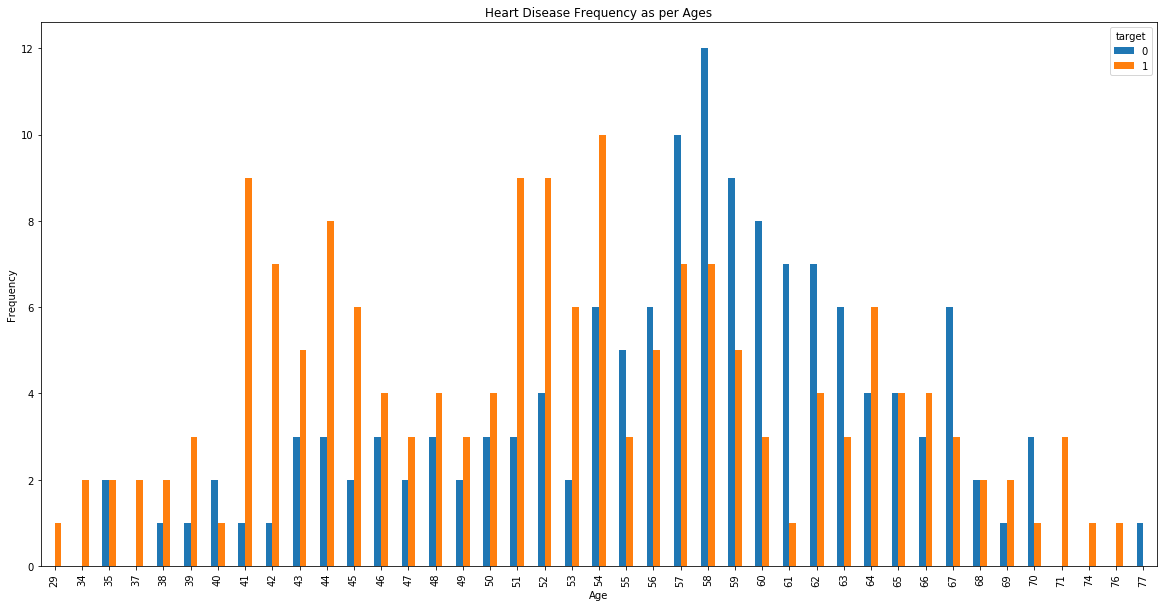

In [82]:
# frequency of people with or without heart disease as per age
pd.crosstab(df.age, df.target).plot(kind= 'bar', figsize= (20,10))
plt.title('Heart Disease Frequency as per Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('diseasenages.png')
plt.show

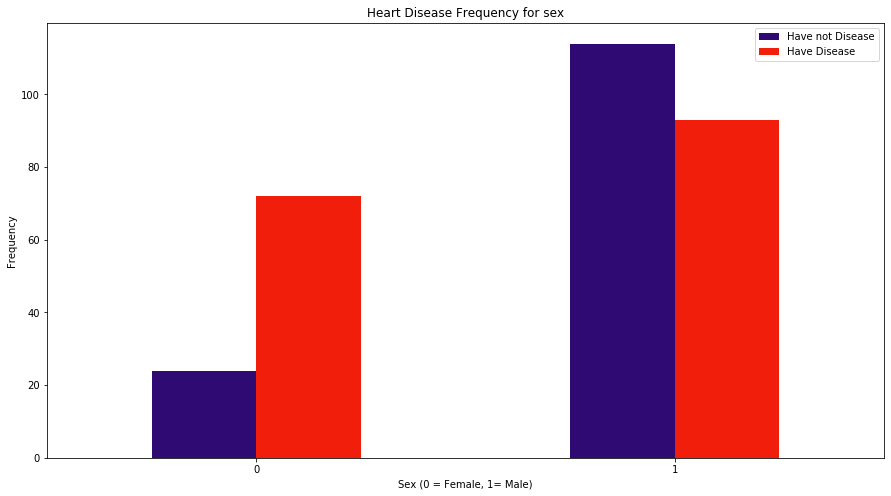

In [83]:
# frequency of people with or without heart disease as per sex
pd.crosstab(df.sex, df.target).plot(kind= 'bar', figsize=(15,8), color =['#2F0A73','#F01E0B'])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('Sex (0 = Female, 1= Male)')
plt.xticks(rotation = 0)
plt.legend(['Have not Disease', 'Have Disease'])
plt.ylabel('Frequency')
plt.show()

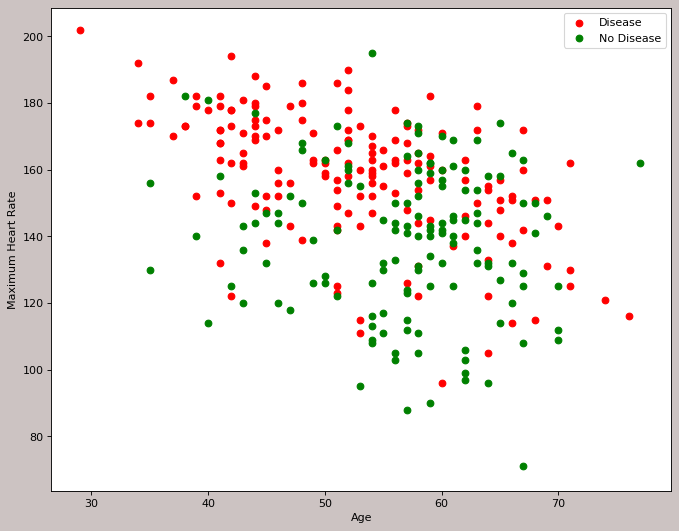

In [84]:
# frequency of people with or without heart disease as per max heart rate

#                figsize=(width, hieght)  dpi to improve rsolution
figure(num=None, figsize=(10,8 ), dpi=80, facecolor='#CCC3C2', edgecolor='k') # to increase the size of the graph
plt.scatter(x= df.age[df.target == 1], y= df.thalach[(df.target == 1)], c= 'r')
plt.scatter(x= df.age[df.target == 0], y= df.thalach[(df.target == 0)], c= 'g')
plt.legend(['Disease', 'No Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

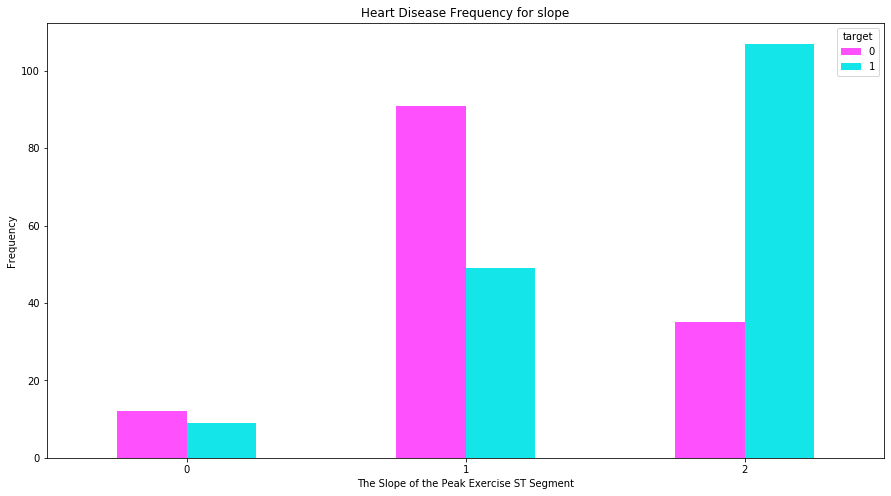

In [85]:
# frequency of people with or without heart disease as per slope

pd.crosstab(df.slope, df.target).plot(kind='bar', figsize=(15,8), color=['#FF50FE', '#14E5E8'])
plt.title('Heart Disease Frequency for slope')
plt.xlabel('The Slope of the Peak Exercise ST Segment')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

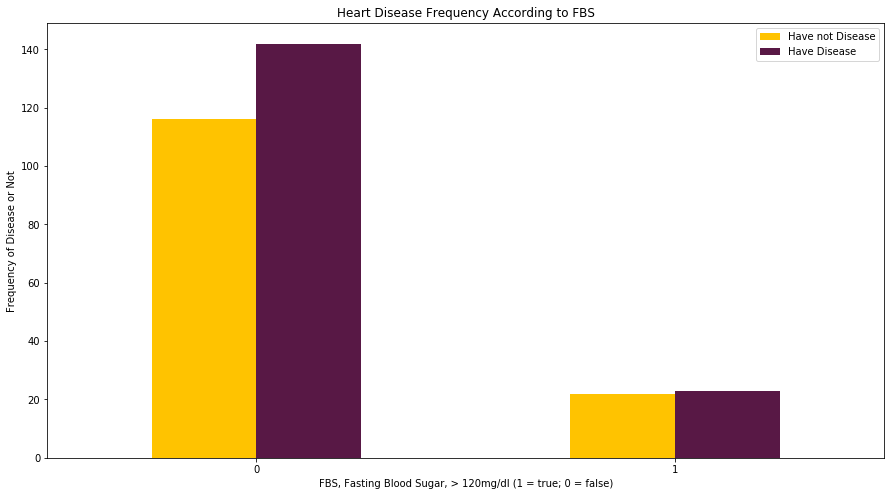

In [86]:
# frequency of people with or without heart disease as per fbs

pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(15,8), color=['#FFC300','#581845'])
plt.title('Heart Disease Frequency According to FBS')
plt.xlabel('FBS, Fasting Blood Sugar, > 120mg/dl (1 = true; 0 = false)')
plt.xticks(rotation= 0)
plt.legend(['Have not Disease', 'Have Disease'])
plt.ylabel('Frequency of Disease or Not')
plt.show()

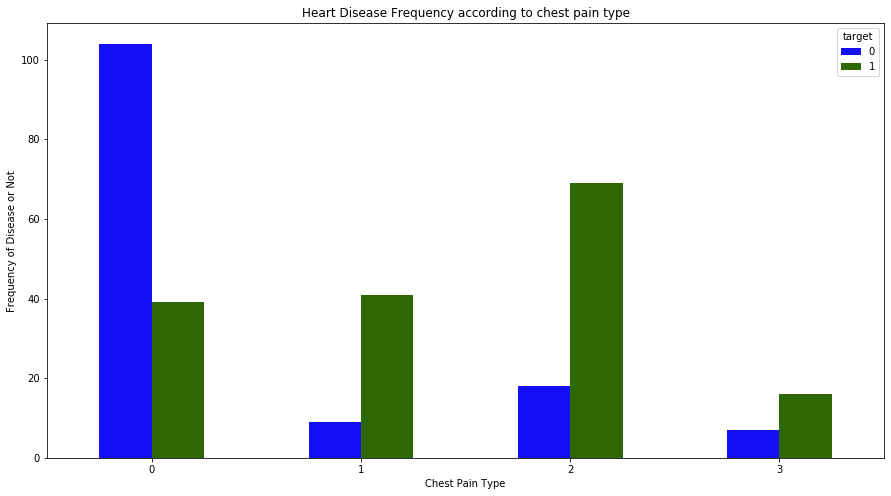

In [87]:
# frequency of people with or without heart disease as per chest pain type

pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(15,8), color=['#1310F9', '#2E6806'])
plt.title('Heart Disease Frequency according to chest pain type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation= 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

## Data cleansing and wrangling

#### Task 1: Creating dummy variables

In [88]:
a = pd.get_dummies( df['cp'], prefix='cp')
b = pd.get_dummies( df['thal'], prefix='thal')
c= pd.get_dummies(df['slope'], prefix= 'slope')

In [89]:
# adding dummy variable to the dataframe
list_dum = [df, a, b, c]
df = pd.concat(list_dum, axis = 1)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   3       145   233    1        0      150      0      2.3  ...   
1   37    1   2       130   250    0        1      187      0      3.5  ...   
2   41    0   1       130   204    0        0      172      0      1.4  ...   
3   56    1   1       120   236    0        1      178      0      0.8  ...   
4   57    0   0       120   354    0        1      163      1      0.6  ...   

   cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  slope_1  slope_2  
0     0     0     1       0       1       0       0        1        0        0  
1     0     1     0       0       0       1       0        1        0        0  
2     1     0     0       0       0       1       0        0        0        1  
3     1     0     0       0       0       1       0        0        0        1  
4     0     0     0       0       0       1       0        0        0        1  

[5 rows x 25 columns]

In [90]:
# dropping the columns for which we have created dummy variables
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  ...  \
0   63    1       145   233    1        0      150      0      2.3   0  ...   
1   37    1       130   250    0        1      187      0      3.5   0  ...   
2   41    0       130   204    0        0      172      0      1.4   0  ...   
3   56    1       120   236    0        1      178      0      0.8   0  ...   
4   57    0       120   354    0        1      163      1      0.6   0  ...   

   cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  slope_1  slope_2  
0     0     0     1       0       1       0       0        1        0        0  
1     0     1     0       0       0       1       0        1        0        0  
2     1     0     0       0       0       1       0        0        0        1  
3     1     0     0       0       0       1       0        0        0        1  
4     0     0     0       0       0       1       0        0        0        1  

[5 rows x 22 columns]

## Splitting the dataset and standardarization

In [91]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [92]:
x_data

age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  ...  \
0     63    1       145   233    1        0      150      0      2.3   0  ...   
1     37    1       130   250    0        1      187      0      3.5   0  ...   
2     41    0       130   204    0        0      172      0      1.4   0  ...   
3     56    1       120   236    0        1      178      0      0.8   0  ...   
4     57    0       120   354    0        1      163      1      0.6   0  ...   
..   ...  ...       ...   ...  ...      ...      ...    ...      ...  ..  ...   
298   57    0       140   241    0        1      123      1      0.2   0  ...   
299   45    1       110   264    0        1      132      0      1.2   0  ...   
300   68    1       144   193    1        1      141      0      3.4   2  ...   
301   57    1       130   131    0        1      115      1      1.2   1  ...   
302   57    0       130   236    0        0      174      0      0.0   1  ...   

     cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  slope_1  \
0       0     0     1       0       1       0       0        1        0   
1       0     1     0       0       0       1       0        1        0   
2       1     0     0       0       0       1       0        0        0   
3       1     0     0       0       0       1       0        0        0   
4       0     0     0       0       0       1       0        0        0   
..    ...   ...   ...     ...     ...     ...     ...      ...      ...   
298     0     0     0       0       0       0       1        0        1   
299     0     0     1       0       0       0       1        0        1   
300     0     0     0       0       0       0       1        0        1   
301     0     0     0       0       0       0       1        0        1   
302     1     0     0       0       0       1       0        0        1   

     slope_2  
0          0  
1          0  
2          1  
3          1  
4          1  
..       ...  
298        0  
299        0  
300        0  
301        0  
302        0  

[303 rows x 21 columns]

### Normalize

In [93]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [94]:
x

age  sex  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.708333  1.0  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1    0.166667  1.0  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2    0.250000  0.0  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3    0.562500  1.0  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4    0.583333  0.0  0.245283  0.520548  0.0      0.5  0.702290    1.0   
..        ...  ...       ...       ...  ...      ...       ...    ...   
298  0.583333  0.0  0.433962  0.262557  0.0      0.5  0.396947    1.0   
299  0.333333  1.0  0.150943  0.315068  0.0      0.5  0.465649    0.0   
300  0.812500  1.0  0.471698  0.152968  1.0      0.5  0.534351    0.0   
301  0.583333  1.0  0.339623  0.011416  0.0      0.5  0.335878    1.0   
302  0.583333  0.0  0.339623  0.251142  0.0      0.0  0.786260    0.0   

      oldpeak    ca  ...  cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  \
0    0.370968  0.00  ...   0.0   0.0   1.0     0.0     1.0     0.0     0.0   
1    0.564516  0.00  ...   0.0   1.0   0.0     0.0     0.0     1.0     0.0   
2    0.225806  0.00  ...   1.0   0.0   0.0     0.0     0.0     1.0     0.0   
3    0.129032  0.00  ...   1.0   0.0   0.0     0.0     0.0     1.0     0.0   
4    0.096774  0.00  ...   0.0   0.0   0.0     0.0     0.0     1.0     0.0   
..        ...   ...  ...   ...   ...   ...     ...     ...     ...     ...   
298  0.032258  0.00  ...   0.0   0.0   0.0     0.0     0.0     0.0     1.0   
299  0.193548  0.00  ...   0.0   0.0   1.0     0.0     0.0     0.0     1.0   
300  0.548387  0.50  ...   0.0   0.0   0.0     0.0     0.0     0.0     1.0   
301  0.193548  0.25  ...   0.0   0.0   0.0     0.0     0.0     0.0     1.0   
302  0.000000  0.25  ...   1.0   0.0   0.0     0.0     0.0     1.0     0.0   

     slope_0  slope_1  slope_2  
0        1.0      0.0      0.0  
1        1.0      0.0      0.0  
2        0.0      0.0      1.0  
3        0.0      0.0      1.0  
4        0.0      0.0      1.0  
..       ...      ...      ...  
298      0.0      1.0      0.0  
299      0.0      1.0      0.0  
300      0.0      1.0      0.0  
301      0.0      1.0      0.0  
302      0.0      1.0      0.0  

[303 rows x 21 columns]

In [95]:
x.shape

(303, 21)

### Implementing PCA

In [96]:
from sklearn.decomposition import PCA

In [97]:
pca = PCA(n_components = 2)
pca_dt = pca.fit_transform(x)

In [98]:
pca_dt

array([[ 4.99070153e-02, -1.29860581e-01],
       [-7.02729634e-01,  3.02730370e-01],
       [-1.21645215e+00, -4.70599970e-02],
       [-1.07151876e+00, -4.23372599e-01],
       [-3.78464088e-01, -1.23987188e-01],
       [ 7.05939078e-01,  3.36178922e-01],
       [-4.39195328e-01,  1.05817442e+00],
       [-2.61536652e-01, -1.09919533e+00],
       [-2.78036035e-01, -8.89155255e-01],
       [-1.11123870e+00, -1.91742597e-01],
       [-5.20776360e-01, -4.57548591e-01],
       [-1.28423205e+00,  1.83418046e-01],
       [-1.07376667e+00, -4.26583529e-01],
       [ 2.01580027e-01,  7.29410928e-01],
       [-1.04113865e+00,  1.53839572e-02],
       [-5.29918251e-01,  1.26739620e+00],
       [-1.30487677e+00,  1.77552375e-01],
       [-5.89594734e-01,  5.72279718e-01],
       [-5.32684819e-01, -4.69222443e-01],
       [-9.98674527e-01,  3.98472536e-02],
       [ 1.04721607e+00, -3.96832455e-02],
       [-8.32705344e-01, -2.51091719e-01],
       [-5.67687176e-01, -4.84060144e-01],
       [-1.

In [99]:
pca_dt.shape

(303, 2)

In [100]:
# splitting
x_train, x_test, y_train, y_test = train_test_split(pca_dt, y, test_size= 0.2, random_state=0)

In [101]:
# fitting model
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
y_pred = lr.predict(x_test)

In [103]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [104]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8688524590163934

In [106]:
from sklearn.metrics import confusion_matrix

c_m = confusion_matrix(y_test, y_pred)
c_m

array([[24,  3],
       [ 5, 29]], dtype=int64)

In [107]:
from sklearn import metrics
metrics.precision_score(y_test, y_pred )

0.90625